<a href="https://colab.research.google.com/github/coronarita/TIL/blob/main/Keras_Ch4_2_20240517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴스 기사 분류

## 로이터 데이터 셋 로드

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
# 로이터 셋 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [ ]:
train_labels[10]

3

## 데이터 셋 준비

In [ ]:
# 정수 시퀀스 -> 멀티-핫 인코딩

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 들어오는 데이터들 변경
    for i, sequence in enumerate(sequences):
        for j in sequence :
            results[i, j] = 1.
    return results

### Data Encoding

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Label Encoding

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Model 구성

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

### 모델 정의

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), # 46개의 클래스임. 정보 병목 방지를 위해 크게 지정
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

### Model Compile

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 훈련 검증

### 검증 세트 준비

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### 모델 훈련하기

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 113ms/step - loss: 2.8179 - accuracy: 0.4645 - val_loss: 1.9245 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 2s 93ms/step - loss: 1.5968 - accuracy: 0.6783 - val_loss: 1.4232 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 94ms/step - loss: 1.2152 - accuracy: 0.7389 - val_loss: 1.2506 - val_accuracy: 0.7200
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.9966 - accuracy: 0.7865 - val_loss: 1.1061 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.8286 - accuracy: 0.8220 - val_loss: 1.0328 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 0.6992 - accuracy: 0.8502 - val_loss: 0.9901 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5911 - accuracy: 0.8750 - val_loss: 0.9405 - val_accuracy: 0.7970
Epoch 8/20
1

### 훈련과 검증 손실 그리기

In [ ]:
import matplotlib.pyplot as plt

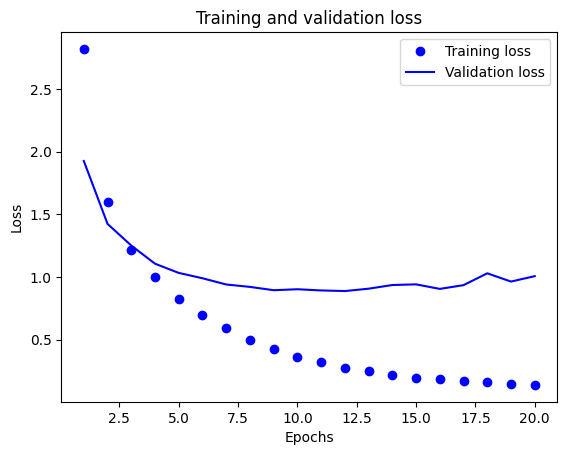

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 훈련, 검증 정확도그리기

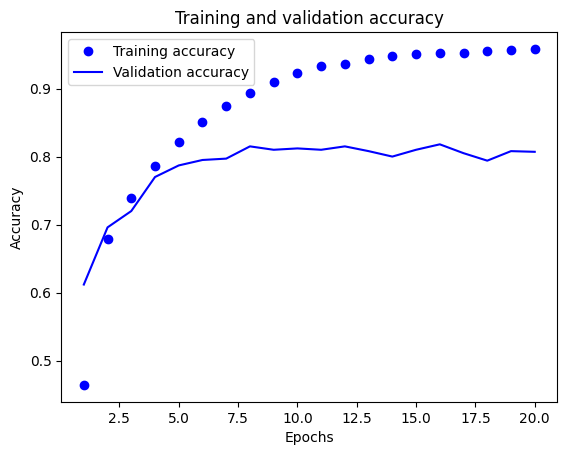

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 모델 처음부터 다시 훈련하기

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 4s 125ms/step - loss: 2.5550 - accuracy: 0.4823
Epoch 2/9
18/18 [==============================] - 1s 61ms/step - loss: 1.4613 - accuracy: 0.6883
Epoch 3/9
18/18 [==============================] - 1s 42ms/step - loss: 1.1332 - accuracy: 0.7492
Epoch 4/9
18/18 [==============================] - 1s 47ms/step - loss: 0.9314 - accuracy: 0.7963
Epoch 5/9
18/18 [==============================] - 1s 47ms/step - loss: 0.7758 - accuracy: 0.8293
Epoch 6/9
18/18 [==============================] - 1s 46ms/step - loss: 0.6464 - accuracy: 0.8586
Epoch 7/9
18/18 [==============================] - 1s 47ms/step - loss: 0.5404 - accuracy: 0.8839
Epoch 8/9
18/18 [==============================] - 1s 47ms/step - loss: 0.4523 - accuracy: 0.9035
Epoch 9/9
71/71 [==============================] - 1s 8ms/step - loss: 0.9173 - accuracy: 0.7916


In [ ]:
results

[0.917336106300354, 0.7916295528411865]

In [ ]:
# 무작위 분류기
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.176313446126447

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 7ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

## 레이블과 손실을 다루는 다른 방법

In [ ]:
# 정수형 벡터로 다룸.
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## 충분히 큰 중간 층을 두어야 하는 이유

### 정보 병목이 있는 모델

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
63/63 [==============================] - 2s 31ms/step - loss: 2.7677 - accuracy: 0.3758 - val_loss: 1.9807 - val_accuracy: 0.5790
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.6308 - accuracy: 0.6363 - val_loss: 1.4871 - val_accuracy: 0.6650
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.3143 - accuracy: 0.7001 - val_loss: 1.3652 - val_accuracy: 0.6890
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1653 - accuracy: 0.7243 - val_loss: 1.3229 - val_accuracy: 0.6930
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.0645 - accuracy: 0.7420 - val_loss: 1.2891 - val_accuracy: 0.6950
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9843 - accuracy: 0.7581 - val_loss: 1.2974 - val_accuracy: 0.6900
Epoch 7/20
63/63 [==============================] - 1s 23ms/step - loss: 0.9157 - accuracy: 0.7655 - val_loss: 1.2830 - val_accuracy: 0.7010
Epoch 8/20
63

[1.775395393371582, 0.6945680975914001]

## 추가 실험
- 더 크거나 작은 층(32, 128유닛)

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 2.2693 - accuracy: 0.5727 - val_loss: 1.5068 - val_accuracy: 0.6670
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2292 - accuracy: 0.7276 - val_loss: 1.1995 - val_accuracy: 0.7300
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 0.9293 - accuracy: 0.7873 - val_loss: 1.0744 - val_accuracy: 0.7630
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 0.7220 - accuracy: 0.8356 - val_loss: 0.9921 - val_accuracy: 0.7830
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 0.5629 - accuracy: 0.8771 - val_loss: 0.9458 - val_accuracy: 0.8040
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.4427 - accuracy: 0.9039 - val_loss: 0.9288 - val_accuracy: 0.8080
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.3559 - accuracy: 0.9217 - val_loss: 0.9468 - val_accuracy: 0.8050
Epoch 8/20
63

[1.2220786809921265, 0.784060537815094]

In [ ]:
 model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
63/63 [==============================] - 3s 42ms/step - loss: 1.6229 - accuracy: 0.6436 - val_loss: 1.1571 - val_accuracy: 0.7320
Epoch 2/20
63/63 [==============================] - 3s 48ms/step - loss: 0.8342 - accuracy: 0.8150 - val_loss: 0.8967 - val_accuracy: 0.7970
Epoch 3/20
63/63 [==============================] - 3s 41ms/step - loss: 0.5136 - accuracy: 0.8903 - val_loss: 0.8902 - val_accuracy: 0.8120
Epoch 4/20
63/63 [==============================] - 2s 35ms/step - loss: 0.3393 - accuracy: 0.9281 - val_loss: 0.8625 - val_accuracy: 0.8200
Epoch 5/20
63/63 [==============================] - 2s 28ms/step - loss: 0.2572 - accuracy: 0.9397 - val_loss: 0.8620 - val_accuracy: 0.8210
Epoch 6/20
63/63 [==============================] - 2s 27ms/step - loss: 0.2097 - accuracy: 0.9486 - val_loss: 0.8668 - val_accuracy: 0.8180
Epoch 7/20
63/63 [==============================] - 2s 29ms/step - loss: 0.1873 - accuracy: 0.9500 - val_loss: 0.9282 - val_accuracy: 0.8160
Epoch 8/20
63

[1.1908551454544067, 0.7853962779045105]

- 중간 층 수 1, 3개 변경

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.2168 - accuracy: 0.5857 - val_loss: 1.4873 - val_accuracy: 0.6850
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2372 - accuracy: 0.7425 - val_loss: 1.1580 - val_accuracy: 0.7530
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 0.9253 - accuracy: 0.8092 - val_loss: 1.0128 - val_accuracy: 0.7940
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 0.7251 - accuracy: 0.8490 - val_loss: 0.9234 - val_accuracy: 0.8170
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 0.5781 - accuracy: 0.8794 - val_loss: 0.8672 - val_accuracy: 0.8180
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 0.4683 - accuracy: 0.9013 - val_loss: 0.8387 - val_accuracy: 0.8170
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 0.3867 - accuracy: 0.9178 - val_loss: 0.8238 - val_accuracy: 0.8200
Epoch 8/20
63

[1.0350614786148071, 0.792965292930603]

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 2.0982 - accuracy: 0.5655 - val_loss: 1.4768 - val_accuracy: 0.6640
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 1.2719 - accuracy: 0.7194 - val_loss: 1.2688 - val_accuracy: 0.7080
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 0.9759 - accuracy: 0.7791 - val_loss: 1.1218 - val_accuracy: 0.7520
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 0.7674 - accuracy: 0.8198 - val_loss: 1.0367 - val_accuracy: 0.7620
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.5999 - accuracy: 0.8619 - val_loss: 1.0287 - val_accuracy: 0.7910
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4716 - accuracy: 0.8945 - val_loss: 1.0202 - val_accuracy: 0.8050
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.3760 - accuracy: 0.9157 - val_loss: 1.0238 - val_accuracy: 0.7960
Epoch 8/20
63

[1.5199178457260132, 0.7693677544593811]

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    '32 Units':[95.68, 80, 78.4],
    '128 Units':[95.5, 80.7, 78.54],
    '1 Hidden Layer':[95.64, 81.6, 79.29],
    '3 Hidden Layers':[95.7, 77.9, 76.93],
}

df = pd.DataFrame(data, index=['Train_acc', 'Val_acc', 'Test_acc'])
df

,32 Units,128 Units,1 Hidden Layer,3 Hidden Layers
Train_acc,95.68,95.50,95.64,95.70
Val_acc,80.00,80.70,81.60,77.90
Test_acc,78.40,78.54,79.29,76.93


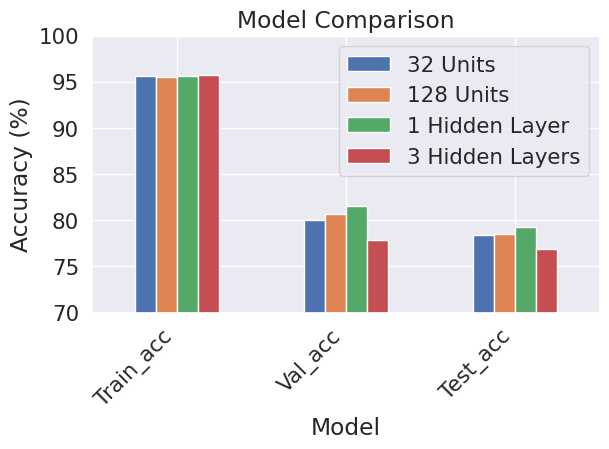

In [33]:
# prompt: Make comparison chart using df, The range of y is 70 to 100%

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(kind='bar', title='Model Comparison', ax=ax)
ax.set_ylim(70, 100)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


[링크 텍스트](https://)# 주택 가격 예측

# 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


## 데이터셋 준비(정규화)

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 모델 구성

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

## K-fold Validation

### k-fold 검증하기

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
all_scores

[2.046107292175293, 2.465610980987549, 2.4656271934509277, 2.489896774291992]

In [ ]:
np.mean(all_scores)

2.3668105602264404

### 각 폴드의 검증 점수를 저장하기

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


### K-겹 점수 평균 기록하기

In [ ]:
average_mae_history =[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### 검증점수 그래프 그리기

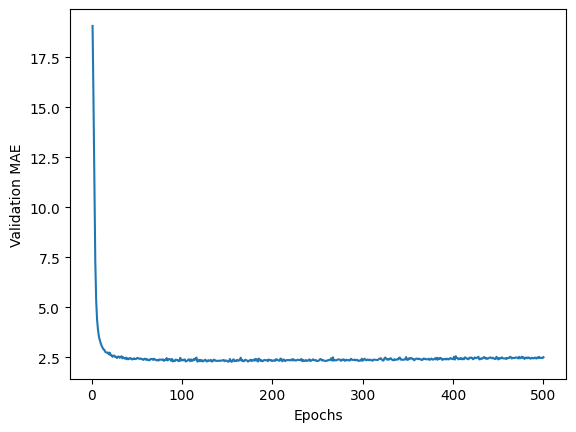

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기**

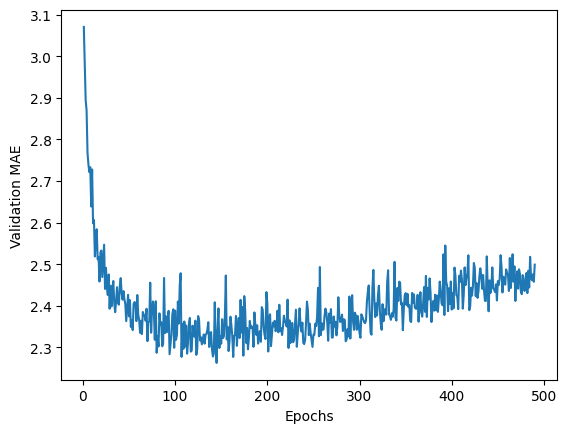

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### 최종 모델 훈련하기

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 12.4657 - mae: 2.3337


In [ ]:
test_mae_score

2.333681583404541

### 새로운 데이터에 대해 예측하기

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 4ms/step


array([7.9926653], dtype=float32)

## 추가 학습